# Logistic Regression Exercise

Now it's your turn to implement logistic regression on a new data set. For this purpose we use the Titanic Dataset. It includes personal information of all passengers on the Titanic as well as they survived the sinking of the Titanic or died.

Here’s the **Data Dictionary** of the dataset:

- PassengerID: type should be integers

- Survived: survived or not

- Pclass: class of Travel of every passenger

- Name: the name of the passenger

- Sex: gender

- Age: age of passengers

- SibSp: No. of siblings/spouse aboard

- Parch: No. of parent/child aboard

- Ticket: Ticket number

- Fare: what Prices they paid

- Cabin: cabin number

- Embarked: the port in which a passenger has embarked.

        - C: Cherbourg , S: Southampton , Q: Queenstown


You will find the data in the data folder (it's a zip folder, so you first have to unzip it).


## What you should do:

- conduct a brief EDA to become familiar with the data
- use Logistic Regression to predict if a passenger died or not

## How to do it:

Time is short, so aim for the simplest viable product first:
- Load the data

- Get a quick overview of the data

- Agree on a classification metric for the task 

- Create a simple heuristic/educated guess for the classification first. This is called a "baseline model". It is used to compare more complex models later (in this case: logistic regression). You as a data scientist want to prove how much your work/ML could improve the business metric, therefore you need a baseline model for comparison. In some cases you want to improve on an already existing model in your company which would be your baseline model then. In other cases, there are typical baseline models used in the specific field. For other tasks, you have to come up with a simple but meaningful idea, how to classify the data based on your business understanding (EDA). A baseline model should follow Occam’s Razor principle: "A simple model is the best model". 
    - Example of a baseline model: 
    If the task is to classify cats and dogs, a baseline model could be: We classify every animal as cat if its weight < 5 kg, otherwise the animal is classified as a dog. (The value of 5 kg is an educated guess, based on our business understanding/EDA.) 

- use one or two already numerical features to create a simple first model
    -  did it even beat your base model?

- Now you can go through the data science lifecycle again and again:
    - clean the data better

    - get more insights with EDA

    - add more features

    - do feature engineering 
    
    and check if your work improves your model further!

- Stop whenever time is up or you cannot improve your model any further.

The next notebook contains a solution to this problem. If you want to compare your final result with the result of this notebook, choose **25** as random seed and a test size of 30% for your train test split.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [2]:
df = pd.read_csv("data/titanic.csv")
df.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 8
sns.set_style('whitegrid')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


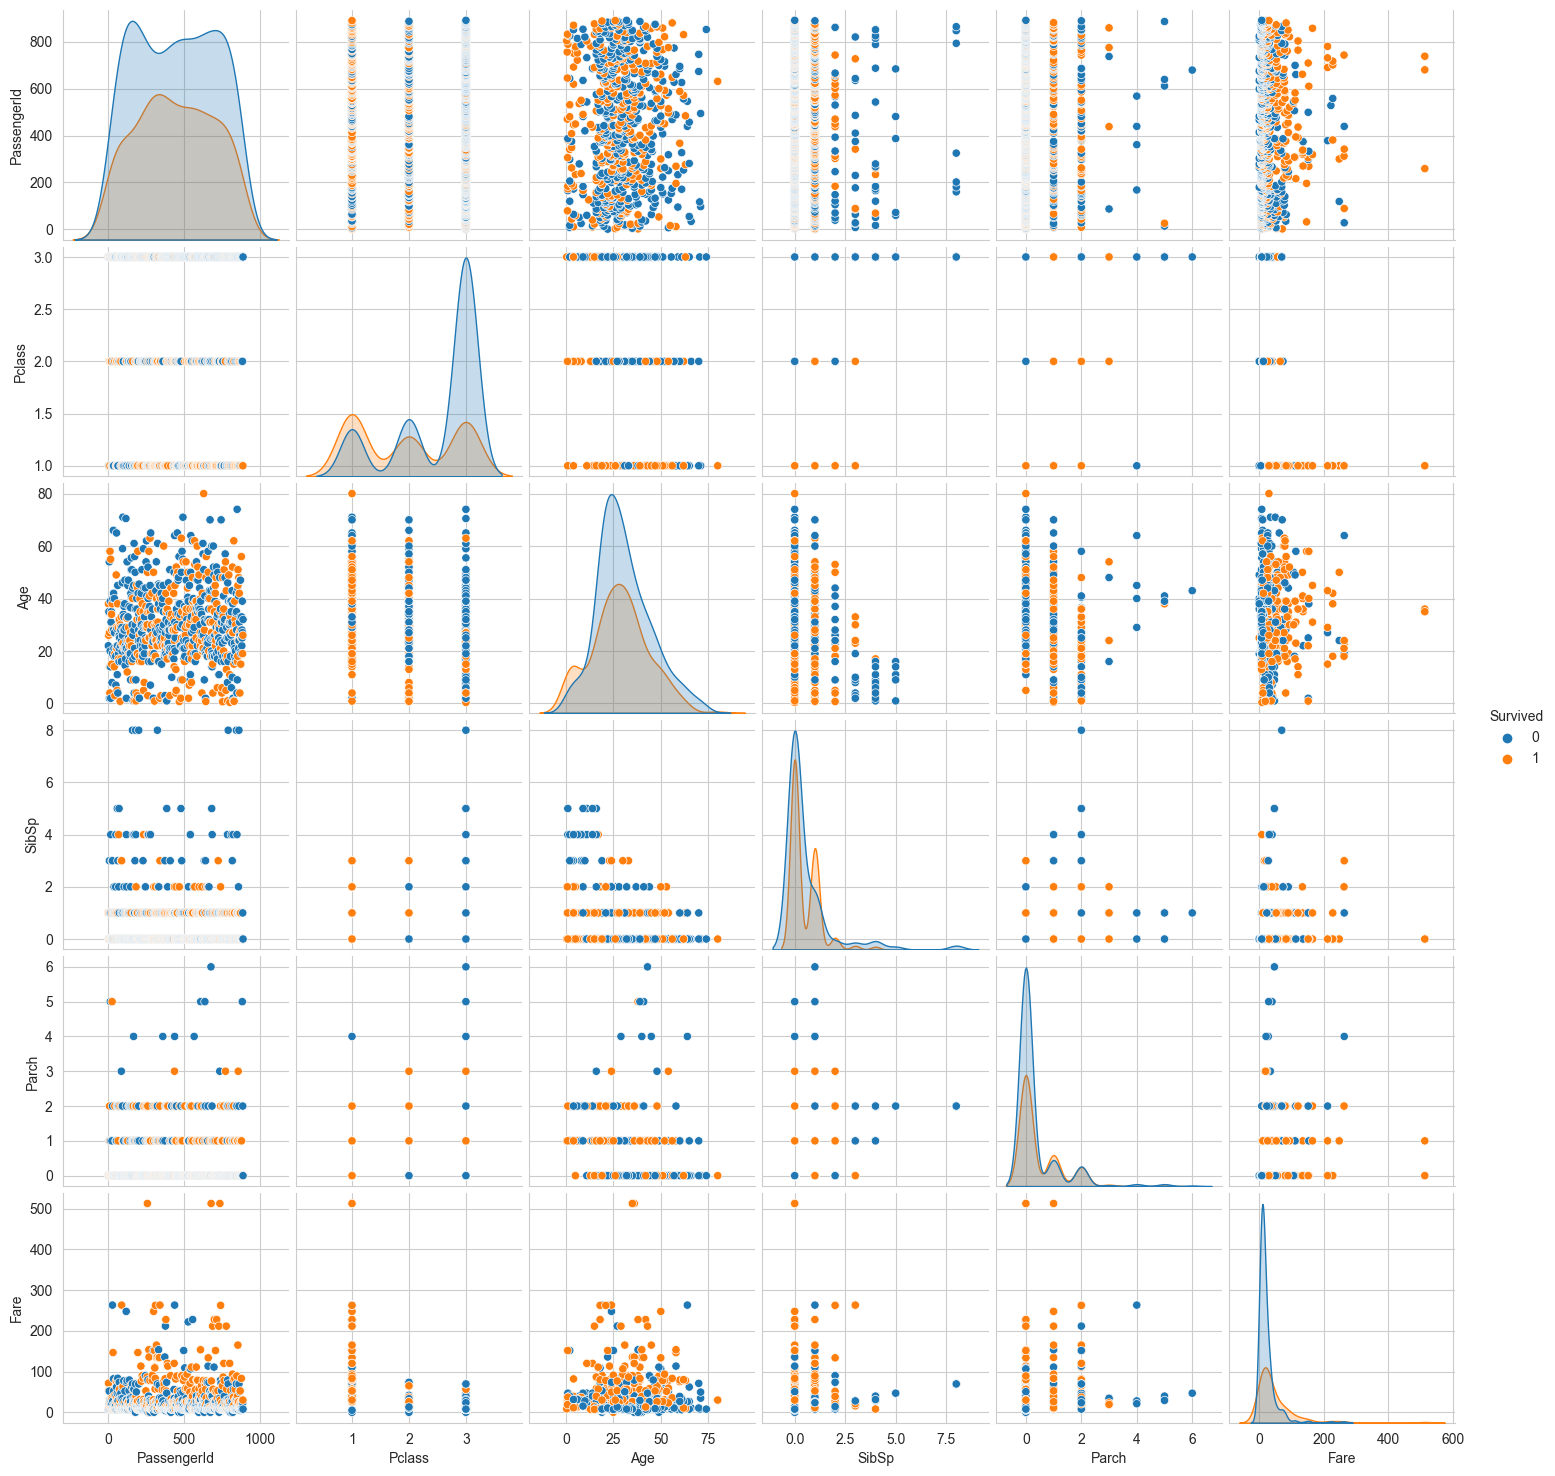

In [5]:
sns.pairplot(df,hue='Survived')

In [6]:
X = df[['Pclass','Fare']]
y = df['Survived']




In [7]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)
print(X)

     Pclass     Fare
0         3   7.2500
1         1  71.2833
2         3   7.9250
3         1  53.1000
4         3   8.0500
..      ...      ...
886       2  13.0000
887       1  30.0000
888       3  23.4500
889       1  30.0000
890       3   7.7500

[891 rows x 2 columns]


Accuracy on train set: 0.67
Accuracy on test set: 0.7
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.71      0.85      0.78       165
           1       0.66      0.45      0.53       103

    accuracy                           0.70       268
   macro avg       0.68      0.65      0.65       268
weighted avg       0.69      0.70      0.68       268

--------------------------------------------------------------------------------


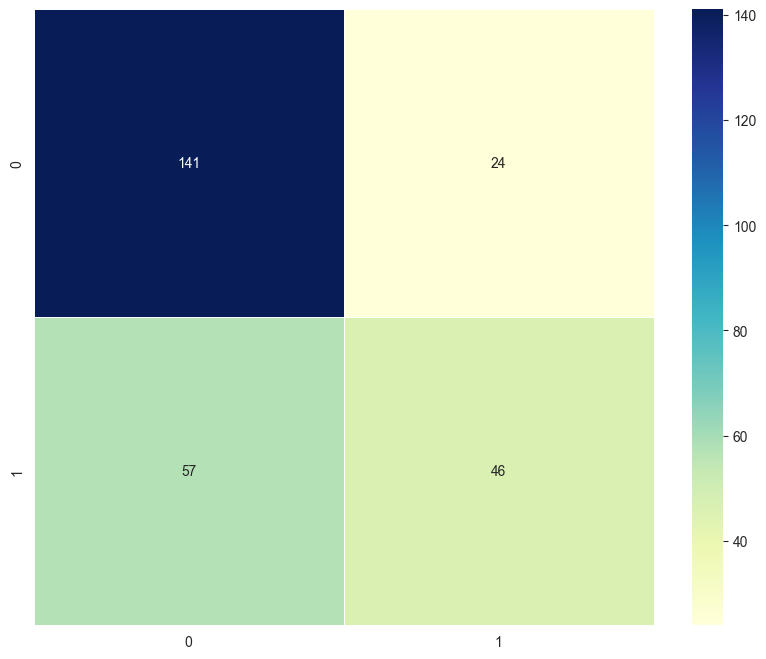

In [8]:
# Logistic Regression
log_reg1 = LogisticRegression(max_iter=1000)
log_reg1.fit(X_train, y_train)

y_pred_train = log_reg1.predict(X_train)
y_pred = log_reg1.predict(X_test)

# Print accuracy of our model
print("Accuracy on train set:", round(accuracy_score(y_train, y_pred_train), 2))
print("Accuracy on test set:", round(accuracy_score(y_test, y_pred), 2))
print("--------"*10)

# Print classification report of our model
print(classification_report(y_test, y_pred))
print("--------"*10)

# Evaluate the model with a confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5);


In [9]:
df.dropna(subset='Age', inplace=True)
df.info()
df.head()
df['Sex'].unique()
df['Sex1'] = df['Sex'].map({'female': 0, 'male': 1})
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Name         714 non-null    object 
 4   Sex          714 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        714 non-null    int64  
 7   Parch        714 non-null    int64  
 8   Ticket       714 non-null    object 
 9   Fare         714 non-null    float64
 10  Cabin        185 non-null    object 
 11  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.5+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 n

Accuracy on train set: 0.79
Accuracy on test set: 0.77
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       129
           1       0.77      0.62      0.68        86

    accuracy                           0.77       215
   macro avg       0.77      0.75      0.75       215
weighted avg       0.77      0.77      0.77       215

--------------------------------------------------------------------------------
[[-0.31383549 -0.00442003 -0.2413514   0.12925268  0.01252422 -1.32757795]]
[0.86117683]


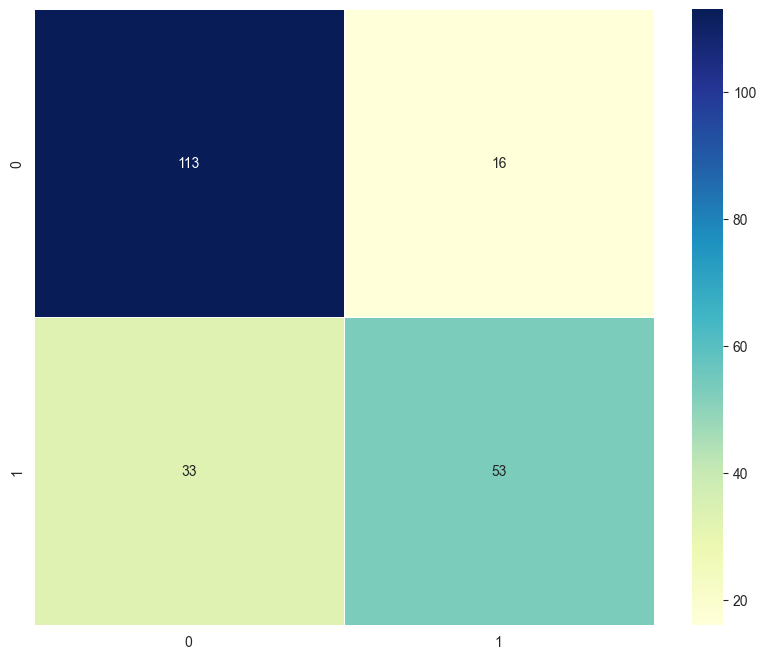

In [10]:
X2 = df[['Pclass','Age','SibSp','Parch','Fare','Sex1']]
#X2 = df[['Age','Sex1']]
y2 = df['Survived']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=25)

# Logistic Regression
log_reg2 = LogisticRegression(max_iter=1000, solver='liblinear', C=0.1)
log_reg2.fit(X_train2, y_train2)

y_pred_train2 = log_reg2.predict(X_train2)
y_pred2 = log_reg2.predict(X_test2)

# Print accuracy of our model
print("Accuracy on train set:", round(accuracy_score(y_train2, y_pred_train2), 2))
print("Accuracy on test set:", round(accuracy_score(y_test2, y_pred2), 2))
print("--------"*10)

# Print classification report of our model
print(classification_report(y_test2, y_pred2))
print("--------"*10)
print(log_reg2.coef_)
print(log_reg2.intercept_)
# Evaluate the model with a confusion matrix
cm = confusion_matrix(y_test2, y_pred2)
sns.heatmap(cm, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5);

